# Analítica y Ciencia de Datos

## CIDE - Otoño 2015

### Modelos de Clasificación

# Referencias

Capítulo 4 de [ESL](http://web.stanford.edu/~hastie/ElemStatLearn/).

Capítulo 4 de [ISL](http://www-bcf.usc.edu/~gareth/ISL/)

Capítulos de Modelos de Elección Discreta de un texto econométrico (Greene, Wooldridge o Cameron y Trivedi). 



# Introducción a los Modelos de Clasificación


* En las notas [introductorias](6_Intro_MachineLearning.ipynb) mencionamos algunos de los conceptos que siguen a continuación.


* A diferencia de los modelos de regresión, los modelos de clasificación tienen como objetivo estimar la probabilidad de pertenecer a una categoría $k = 1, \cdots, K$.


* La variable dependiente $y_i$ es una variable *categórica* que indica a qué categoría pertenece el individuo $i$.


* Así, $y_i \in \{1,0\}$ indica la pertenencia a una de dos categorías, y las etiquetas $1,0$ carecen de contenido numérico u ordinal, así que los podríamos haber permutado, o nombrado de la manera que queramos.


* Ejemplo del mundo de los negocios abundan:

    * ¿Es el cliente alguien que potencialmente no paga su tarjeta de crédito?
    
    * ¿Es un cliente *fiel*, o nos abandonará en el siguiente período?
    
    * ¿Si le ofrecemos el producto, el cliente lo aceptará?
    

# Errores de Clasificación

* A diferencia de un modelo de regresión, la estructura no ordinal de la variable dependiente enriquece el análisis de errores que podemos hacer para evaluar un modelo.


* En regresión teníamos que una métrica de ajuste o error de un modelo era la *suma de residuos al cuadrado*.


* En el caso de modelos de clasificación esta estructura es más rica.


* Podemos empezar con el **error de clasificación**:

$$
\frac{1}{N}\sum_{i=1}^N I[\hat{y}_i \neq y_i]
$$

donde $I[x]$ es una variable indicadora que toma el valor $1$ cuando $x$ es verdadera y $0$ en caso contrario.

# ¿Pero cómo clasificamos?

* Todavía no está claro, pero eventualmente formularemos modelos de la probabilidad de pertenecer a una categoría. 


* El resultado del modelo es una probabilidad estimada $\hat{p}_{ik}$ de que el individuo $i$ pertenezca a la categoría $k \in 1, \cdots, K$.


* La probabilidad nos da una medida contínua de pertenecer a una categoría, pero nuestro objetivo es predicir la categoría.


* Así, por ejemplo, podemos decir que el individuo $i$ pertenece a la categoría que maximiza la probabilidad.

    * En el caso de dos categorías: la predicción es 
    $$
    i \hat{\in} k \iff \hat{p}_{ik}>0.5
    $$
    
   
* Pero **noten** que el valor límite o *threshold* $0.5$ es arbitrario, y más adelante veremos que podemos utilizar cualquiera en el intervalo $[min(\hat{p}_{i,k}), max(\hat{p}_{i,k})]$

# Matrices de Confusión


* Veamos el caso más simple de dos categorías $y_i \in \{0,1\}$.


* Aunque el error de clasificación anterior permite tener una primera métrica, para nosotros puede ser más relevante clasificar mal a una categoría que a otra.

* Para esto se crea una matriz de confusión, donde las filas denotan la clasificación real u observada y las columnas la clasificación que se obtiene del modelo.

$$
\begin{array}{|c|c|c|}
\hline
& \bf \hat{0} & \bf \hat{1} \\
\hline
\bf 0 & \text{Verdaderos Positivos} & \text{Falsos Negativos} \\
\hline
\bf 1 & \text{Falsos Positivos} & \text{Verdaderos Negativos} \\
\hline
\end{array}
$$


* Acá estamos siguiendo la tradición en esta literatura de denotar a la categoría $1$ como un negativo, y la categoría $0$ como positivo.


* Lo importante es entender que con $K$ categorías tenemos la posibilidad de encontrar $K$ errores de clasificación distintos.

* Hay dos métricas importantes que se obtienen de una matriz de confusión:

    1. **Sensibilidad**: o tasa de verdaderos positivos
    $$
    \text{sensibilidad} = \frac{VP}{VP + FN}
    $$
    
    2. **Especificidad**: o tasa de verdaderos negativos
    $$
    \text{especificidad} = \frac{VN}{VN + FP}
    $$
    
* En el contexto de modelos de clasificación:

    * **Error Tipo 1:** o falso positivo: $1-\text{especificidad}$
    * **Error Tipo 2:** o falso negativo: $1-\text{sensibilidad}$

# Curvas ROC

 ![caption](figures/roc_curve.png)
 
Figura 4.8 de ISL

# Curvas ROC (cont.)


* Las tasas de verdaderos positivos y falsos positivos son una buena medida del comportamiento de un modelo.


* Sin embargo, dependen crucialmente del *threshold que utilicemos*.


* La curva ROC permite mirar cómo cambian las tasas de verdadero y falsos positivos a medida que variamos los *thresholds* de clasificación.

$$
i \hat{\in} 0 \iff \hat{p}_{i0} > \tau
$$


* Así, si $\tau = 1$ la matriz de confusión es

$$
\begin{array}{|c|c|c|}
\hline
& \bf \hat{0} & \bf \hat{1} \\
\hline
\bf 0 & 0 & n_0 \\
\hline
\bf 1 & 0 & n_1 \\
\hline
\end{array}
$$

donde $n_i = \#\{\text{$i$ en la muestra de entrenamiento}\}$ y

$$
\text{sensibilidad} = 0$, $1-\text{especificidad} = 0
$$

obteniendo el punto en la esquina inferior izquierda de la curva ROC.

* De la misma forma $\tau=0$ implica que todas las observaciones se asignan a la categoría $0$ y obtenemos el punto superior derecho.

# Curvas ROC (cont.)

* ¿Qué pasa con la diagonal?

* Los puntos de la diagonal tienen la característica que los errores de clasificación en una u otra categoría son exactamente iguales.

* Corresponden a una asignación aleatoria (un "volado")

    * Sirve como referencia o benchmark para medir a nuestros modelos.
    

* Intuitivamente quisieramos modelos que estén muy lejos de la diagonal.


* Matemáticamente, quisieramos que el **área debajo de la curva** (AUC) sea lo mayor posible.


* Noten el parecido con el coeficiente de Gini.  Todas las dificultades que se conocen para comparar distribuciones de ingreso mediante el coeficiente de Gini son válidas acá.

# Costos directos, indirectos y de oportunidad

* Una alternativa con modelos de clasificación es tener una medida del costo esperado de un modelo, es decir, tener en cuenta las asimetrías entre un clasificación correcta de cada alternativa.


* Tomemos el caso de un modelo de *credit scoring*

$$
y_i = 
\begin{cases}
1 & \text{si cliente $i$ ha dejado de pagar sus créditos}\\
0 & \text{si cliente $i$ ha pagado sus créditos}
\end{cases}
$$


* El score crediticio es una función de la probabilidad de que el cliente pague.


* Así, un *menor* score sugiere que hay una mayor probabilidad de incumplimiento o de impago.




# Ejemplo Score Crediticio


* Supongamos que la matriz de confusión para un modelo y *threshold* dados es

$$
\begin{array}{|c|c|c|}
\hline
& \bf \hat{0} & \bf \hat{1} \\
\hline
\bf 0 & n_{00} & n_{01} \\
\hline
\bf 1 & n_{10} & n_{11} \\
\hline
\end{array}
$$

Miremos caso por caso:


* **Caso $0\hat{0}$**: cliente bueno y el modelo lo asigna correctamente.  Le damos una TdC, y nos deja una rentabilidad promedio de $r_{00} >0$.


* **Caso $0\hat{1}$**: cliente bueno pero el modelo lo clasifica como uno malo.  *No* le damos crédito, así que obtenemos una rentabilidad $r_{01} = 0$. $\Rightarrow$ **Costo de oportunidad de mala clasificación!**


* **Caso $1\hat{0}$**: cliente malo, pero el modelo lo clasifica como si fuera bueno.  Le damos una TdC y no nos paga $r_{10}<0$.  $\Rightarrow$ **costo directo de mala clasificación**


* **Caso $1\hat{1}$**: clientes malo y está bien clasificado.  No le damos una TdC, así que $r_{11} = 0$.


##### ¿Cuál es la rentabilidad esperada que obtenemos del modelo?

$$
E(r|\mathcal{M}) = \sum_{ij} p_{ij}r_{ij}  = p_{00}r_{00} + p_{10}r_{10}
$$

donde $p_{ij} = n_{ij}/ \sum_{kl} n_{kl}$

##### ¿Cuál es la rentabilidad esperada que obtenemos del modelo, si incluimos el costo de oportunidad?
$$
E(r_{co}|\mathcal{M}) = r_{00}(p_{00} - p_{01}) + p_{10} r_{10}
$$


# Modelos lineales de probabilidad


* Cuando hay sólo dos categorías, $y_i \in {0,1}$, es posible estimar por OLS el modelo.

$$
y_i = x_i' \beta + \epsilon_i
$$


* ¿Por qué se llama un **modelo lineal de probabilidad**?


* En general, queremos modelar 
$$
Prob(y=1|X) = F(X,\beta)
$$

Si $F(X,\beta) = x\beta$, entonces $E(y|x) = x\beta$, y tenemos el modelo lineal.



* Los modelos lineales de probabilidad tienen dos problemas:

    1. Nada garantiza que $\hat{y}_i \in [0,1]$, afectando la interpretación del modelo.
    
    2. Heteroscedasticidad.
    $$
    Var(\epsilon_i) = x_i'\beta(1-x_i'\beta)
    $$


* ¿Cómo se soluciona este problema?  En la **tarea** lo tendrán que hacer.

# Modelos Probit


* Una alternativa natural es asumir que $F(x_i,\beta) = \Phi(x_i'\beta)$, donde $\Phi$ es la función de distribución de una variable aleatoria normal estándar.


* Este tipo de modelos es ampliamente utilizado en econometría, así que no los cubriremos en el curso.


* Si miraremos a profundidad los modelos logísticos o Logit.

# Modelos Logit


* Otra alternativa es usar 
$$
F(x_i,\beta) = \Lambda(x_i'\beta) = \frac{e^{x_i'\beta}}{1+e^{x_i'\beta}}
$$


donde $\Lambda(x_i'\beta)$ denota a la función acumulativa logística.


* ¿Cuál es el valor esperado de $y$?

$$
E(y|x) = 1 \times F(x,\beta) + 0 \times (1-F(x,\beta)) = F(x,\beta)
$$


* Para encontrar los efectos marginales: 

$$
\frac{\partial E(y|x)}{\partial x} = \left[\frac{d F(x,\beta)}{d x'\beta}\right] \beta = f(x,\beta) \beta
$$

donde $f()$ es la función de densidad.

### Nota:
##### A diferencia del modelo lineal de probabilidad donde los efectos marginales son constantes, los efectos marginales en los modelos Logit y Probit son funciones de $x$ y $\beta$.   Generalmente se reportan *evalúandolos en las medias*.


# Efectos marginales del Logit


* En el caso del Logit es inmediato mostrar que:

$$
f(x,\beta) = \frac{e^{x'\beta}}{(1+e^{x'\beta})^2} = \Lambda(x'\beta)(1-\Lambda(x'\beta))
$$

* Así que para el caso de regresores contínuos podemos utilizar la fórmula de la diapósitiva anterior:

$$
\text{Efectos Marginales} = \frac{\partial E(y|x)}{\partial x_k} =  \Lambda(\overline{x}'\beta)(1-\Lambda(\overline{x}'\beta)) \beta_k
$$

donde $\overline{x} := [\overline{x}_1, \cdots, \overline{x}_p]$.


* En el caso de regresores categóricos (variables dummy), la derivada se reemplaza por el efecto marginal:

$$
\text{Efectos Marginales regresor k} = Prob \left(y=1 \Bigg\vert \overline{x}_{(d)}, x_k=1 \right) - Prob \left(y=1 \Bigg\vert  \overline{x}_{(d)}, x_k=0 \right)
$$



# Estimación de los modelos Logit

* Para estimar el modelo es necesario maximizar la logverosimilitud

$$
\begin{eqnarray}
\mathcal{l}(\beta) &=& \sum_{i=1}^N \log p_{g_i}(x_i;\beta)\\
&=& \sum_{i=1}^N y_i \ln \Lambda(x_i,\beta) + (1-y_i) \ln (1-\Lambda(x_i,\beta))
\end{eqnarray}
$$

* Las condiciones de primer orden son:

$$
\frac{\partial \mathcal{l}}{\partial \beta} = \sum_{i} (y_i - \Lambda_i)\mathbf{x}_i = \mathbf{0} = X'(y-\hat{p})
$$

* El Hessiano es

$$
H = \frac{\partial^2 \mathcal{l}}{\partial \beta \partial \beta'} = -\sum_{i} \Lambda_i (1-\Lambda_i)\mathbf{x}_i\mathbf{x}_i' = X'WX 
$$

con $W = diag(\Lambda_i (1-\Lambda_i))$

* Se puede demostrar que la función de verosimilitud es globalmente cóncava, así que existen métodos numéricos iterativos eficientes para resolverlo. 

# El Método de Newton y Mínimos Cuadrados Ponderados Iterativamente (IRLS)

* Supongamos que tenemos una estimación para la iteración $k$: $\beta_{(k)}$


* Vamos a hacer una aproximación de primer orden alrededor de esta estimación utilizando la condición de primer orden

$$
f(\beta_{(k+1)}) \approx f(\beta_{(k)}) + \nabla f(\beta_{(k)})(\beta_{(k+1)}-\beta_{(k)})
$$

donde el gradiente $\nabla$ de la condición de primer orden es el Hessiano


* asumiendo que convergimos y el lado izquierdo es cero, despejando obtenemos la iteración de Newton

$$
\beta_{(k+1)} = \beta_{(k)} -  \nabla f(\beta_{(k)})^{-1}f(\beta_{(k)})
$$

* Reemplazando, obtenemos

$$
\begin{eqnarray}
\beta_{(k+1)} &=& \beta_{(k)} + (X'WX)^{-1}X'(y-\hat{p})\\
&=& (X'WX)^{-1}X'[WX\beta_{(k)} + (y-\hat{p})] \\
&=& (X'WX)^{-1}X'W[X\beta_{(k)} + W^{-1}(y-\hat{p})] \\
&=& (X'WX)^{-1}X'W z
\end{eqnarray}
$$

con $z = X\beta_{(k)} + W^{-1}(y-\hat{p})$


* Así que en cada iteración obtenemos una nueva estimación que es el resultado de estimar por mínimos cuadrados ponderados una regresión de $z$ en $X$ utilizando $W$ como matriz de ponderadores.


* Este método converge muy rápidamente y tendrán que programarlo en la **tarea**.

# La librería de optimización de Scipy

* La ventaja del método de Newton que vimos en la diapósitiva anterior es que lo podemos programar directamente, y se puede ver que converge muy rápidamente.


* Sin embargo es bueno que probemos algunas de las funciones que tiene Scipy para encontrar **mínimos**.

 ![caption](figures/scipy_optimize.png)

# Simulemos un modelo

* En la siguiente lámina vamos a simular un modelo.


* Aunque existe una función para simular números aleatorios de una distribución logística, vamos a hacerlo utilizando el método que mencionamos hace algunas clases.


* En el primer paso simulamos $u \sim U[0,1]$.


* Para obtener $x \sim \Lambda$, vamos a invertir la CDF correspondiente 


$$
\begin{eqnarray*}
u = \frac{e^x}{1+e^x} \iff x = \ln(u) - \ln(1-u)
\end{eqnarray*}
$$ 

In [63]:
# Simulemos un modelo
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(250679)
N = 200

# dos regresores independientes entre sí
x0 = np.ones((N,1))
x1 = 2*np.random.randn(N,1)
x2 = np.random.randn(N,1)
xmat = np.hstack((x0,x1,x2))
beta_true = np.array([-2,3,5]).reshape((3,1))

# vamos a simular residuos de un logit
# Paso 1: simular N números aleatorios de una distribución U[0,1]
# Paso 2: invertir la CDF de una v.a. logística
u = np.random.rand(N,1)
eps = np.log(u) - np.log(1-u)
# variable dependiente latente
y = np.dot(xmat,beta_true) + eps

# necesitamos una variable dicótoma:
d = 1*(y>0)
# vamos la proporción

print d.mean()

0.4


In [64]:
# Vamos a optimizar una función de verosimilitud, así que generémosla

def likeli_fn(betait, ymat,xmat):
    '''
    Función de log verisimilitud de un modelo Logit
    El principal argumento es betait, que corresponde al beta_actual
    '''
    ymat = np.asarray(ymat)
    xmat = np.asarray(xmat)
    betait = np.reshape(np.asarray(betait),(len(betait),1))
    # machine epsilon
    eps = np.finfo(float).eps
    # necesitamos la cdf
    xbeta = np.dot(xmat,betait)
    cdfi  = np.divide(np.exp(xbeta),1+np.exp(xbeta))
    p1i   = np.multiply(ymat,np.log(cdfi))
    p0i   = np.multiply(1-ymat,np.log(1-cdfi))
    logli = np.add(p1i,p0i)
    logli = -logli.sum()
    return logli

#probémosla evalúandola en los parámetros verdaderos
likeli_true = likeli_fn(beta_true,d,xmat)
print likeli_true

26.0011022073


In [65]:
# para inicializar el algoritmo necesitamos un beta_inicial
# Utilicemos OLS----> No está bien!
import sys
sys.path.append('/Users/danielvaughan/Documents/Python Scripts')
import olsdan as ols

olsinit = ols.ols_dan(d,xmat)
beta_init = np.asarray(olsinit.betahat())
pd.DataFrame(np.concatenate((beta_true,beta_init.reshape((3,1))),axis=1))


,0,1
0,-2,0.394901
1,3,0.152144
2,5,0.239861


In [69]:
# probemos primero con Nelder-Mead
nm_solution = optimize.minimize(likeli_fn,beta_init, args=(d,xmat),method='Nelder-Mead')
nm_solution

  status: 0
    nfev: 185
 success: True
     fun: 25.457879197541992
       x: array([-2.09552344,  3.55413633,  5.92813581])
 message: 'Optimization terminated successfully.'
     nit: 103

 ![caption](figures/optimize_minimize.png)

# Optimize: Nelder-Mead


* Como podemos ver el algoritmo convergió a la solución en 103 iteraciones.


* Nelder-Mead es un método numérico de optimización de *fuerza bruta*.


* Si la función objetivo es *bonita*, funciona generalmente


* Pero puede ser muy ineficiente: no utiliza información de la función.


 ![caption](figures/nelder_mead.png) 

In [71]:
# Probemos con el gradiente conjugado (conjugate gradient)
cg_solution = optimize.minimize(likeli_fn,beta_init, args=(d,xmat),method='CG')
cg_solution

  status: 0
 success: True
    njev: 42
    nfev: 210
     fun: nan
       x: array([-39939.57482582,  95644.12187077,  39791.5611497 ])
 message: 'Optimization terminated successfully.'
     jac: array([ nan,  nan,  nan])

In [75]:
# Probemos con el BFGS
ncg_solution = optimize.minimize(likeli_fn,beta_init, args=(d,xmat),method='BFGS')
ncg_solution

   status: 2
  success: False
     njev: 42
     nfev: 210
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      fun: nan
        x: array([-39939.57482582,  95644.12187077,  39791.5611497 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
      jac: array([ nan,  nan,  nan])

In [80]:
# Dado que sabemos el gradiente y el hessiano, vamos a utilizar Newton-CG
def gradient(betait,ymat,xmat):
    '''
    Gradiente de la función de log verosimilitud.  Ver notas
    '''
    ymat = np.asarray(ymat)
    xmat = np.asarray(xmat)
    nobs, nvar = xmat.shape
    betait = np.reshape(np.asarray(betait),(len(betait),1))
    # Calculemos la CDF
    # necesitamos la cdf
    xbeta = np.dot(xmat,betait)
    cdfi  = np.divide(np.exp(xbeta),1+np.exp(xbeta))
    # Usemos broadcasting
    prevec = (ymat - cdfi).reshape((nobs,1))
    grad = prevec*xmat
    grad = -grad.sum(axis=0)
    return grad

def hessian(betait,ymat, xmat):
    '''
    Hessiano del modelo logit.  Ver notas.
    '''
    xmat = np.asarray(xmat)
    nobs, nvar = xmat.shape
    betait = np.reshape(np.asarray(betait),(len(betait),1))
    # Necesitamos estimar la matriz W
    # Primero: cdf
    xbeta = np.dot(xmat,betait)
    cdfi  = np.divide(np.exp(xbeta),1+np.exp(xbeta))
    Pvec  = cdfi.reshape((nobs,1))
    var_mat = np.multiply(Pvec,1-Pvec)
    # No necesitamos la matriz diagonal.  Si N es grande nos quedamos sin memoria rápidamente
    # En su lugar, vamos a usar broadcasting
    prex = var_mat.reshape((nobs,1))*xmat
    hess = np.dot(xmat.T,prex)
    return hess


In [83]:
prebeta = optimize.fmin_ncg(likeli_fn, x0=beta_init,
                            fprime=gradient,
                            fhess=hessian, args=(d,xmat),
                            full_output=True, disp=True,
                            retall=True)
prebeta[0]

Optimization terminated successfully.
         Current function value: 25.457879
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 20
         Hessian evaluations: 10


array([-2.09552385,  3.55413405,  5.92810093])

# Sugerencias para optimizar


* En estas notas quise introducir la librería de optimización.


* Es una librería potente, y tener un ejemplo documentado de cómo usar diferentes métodos es práctico para intentar resolver otros problemas.


* Sin embargo, como los ejemplos de arriba mostraron, antes de optimizar es **recomendable** (imperativo, mejor) tener un conocimiento de:

    1. La función que vamos a optimizar (es cóncava, convexa, el problema es de maximización/minimización, tiene muchos puntos críticos).
    2. El método que vamos a utilizar.
    

* Al final del día, estamos buscando un óptimo.  Y queremos estar seguros que el óptimo es efectivamente eso.

# Regularización y Logit: el Lasso


* En las [láminas anteriores](7_ModelosLineales.ipynb) vimos el Lasso para el caso de modelos lineales.


* Ahora veremos su implementación en el caso de modelos Logit.


* Seguiremos de cerca la Sección 4.4.4 de ESL.


* También se pueden ver [estas láminas de Trevor Hastie](http://web.stanford.edu/~hastie/TALKS/glmnet.pdf).


* O el paper de [Friedman, Hastie y Tibshirani](http://core.ac.uk/download/files/153/6287975.pdf)

# El problema de optimización:


* El objetivo es maximizar la función de logverosimilitud *penalizada*:

$$
\max_{\beta} \sum_i^N y_i(x_i'\beta) - \log(1 + e^{x'\beta}) - \lambda \sum_{i=1}^P |\beta_i|
$$


* Igual que en el caso lineal, $\lambda \geq 0$ es la magnitud de penalización (elegida por nosotros), y penalizamos únicamente los coeficientes diferente de la constante.

    * Por esta razón es conveniente estandarizar *la matriz $X$* antes de iniciar (y excluir la constante).
    

* Al igual que en el Lasso lineal, vamos a utilizar *coordinate descent* para encontrar los óptimos, así que se puede verificar fácilmente que la condición de primer orden es para la coordenada $j$:

$$
x_j'(y-p) = \lambda \cdot sign(\beta_j)
$$

# Pseudocódigo

* La condición de primer orden es similar a la del caso lineal, aunque hay que recordar que las probabilidades estimadas dependen no linealmente de los parámetros a estimar.


* Esta fue la razón para que utilizáramos una aproximación de Newton.


* El pseudocódigo es así:


    1. Fijamos un $\lambda$
    
    2. Loop externo: Aproximación de Newton

        * Este loop transforma el modelo en uno donde se estima Mínimos Cuadrados Ponderados Iterativos (IRLS)
        
    3. Loop interno (coordinate descent): iteramos sobre $k = 1, 2, \cdots, P, 1, 2, \cdots$ hasta converger
    
        * Utilizamos el Lasso lineal sobre las variables transformadas.

# Vamos a programarlo en Python


* Para ver su funcionamiento en Python vamos a utilizar los datos [Enfermedades cardíacas en Sur África de ELS](http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data).


* Así podremos comparar nuestros resultados con los del libro.

In [2]:
import sys
sys.path.append('C:\\Users\\a3940004.EDIFICIOS\\Documents\\Python Scripts')
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import os
os.chdir(u'D:\\Míos\\Clase CIDE\\Datasets\\els\\')
%matplotlib inline


In [3]:
data = pd.read_csv('heart_data.txt')
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [29]:
# Organicemos y transformemos los datos
nobs = data.shape[0]
# Nuestra variable dependiente: presencia de enfermedad cardiáca
yy = data.chd.values.reshape((nobs,1))
# Vamos a estandarizar todas las variables  independientes (incluida la dummy de Historia Familiar)
labs_cont = np.array([u'sbp', u'tobacco', u'ldl', u'adiposity', u'typea', u'obesity', u'alcohol', u'age'])
x_dum     = 1*(data.famhist=='Present').values.reshape((nobs,1))
#xmat_cont = np.concatenate((data[labs_cont].values,x_dum),axis=1)
xmat_cont = data[labs_cont].values
vx = xmat_cont.shape[1]
# Estandaricemos
fullxmat = (xmat_cont - xmat_cont.mean(axis=0).reshape((1,vx)))/xmat_cont.std(axis=0).reshape((1,vx))
fullxmat = np.concatenate((fullxmat, x_dum),axis=1)
labs_x = np.array([u'sbp', u'tobacco', u'ldl', u'adiposity', u'typea', u'obesity', u'alcohol', u'age','famhist'])

In [8]:
# Primera función: Lasso Lineal (igual que la que vimos antes)
def linear_lasso(y,xmat,lambda_t):
    '''
    Estimate linear lasso.
    I have two options:
    1. Y and Xmat have already been standardized
    2. Y and Xmat were demeaned, but not standardized
    Note: demeaning is necessary because we don't want to penalize
    '''
    nobs, nvar = xmat.shape
    # Inicialicemos el vector, la idea es que utilizamos un Lambda grande!
    beta_actual = np.zeros((1,nvar))
    dist = 1
    counter = 0
    maxiter = 10000
    # loop externo: si no hay convergencia continúe
    while dist>0.001 and counter<maxiter: 
        # Loop interno: ciclo con los regresores
        beta_old = beta_actual.copy()
        for k in range(nvar):
            # Residuos parciales excluyendo k
            inc_k    = np.setdiff1d(np.arange(nvar),np.array([k]))
            xmat_k   = xmat[:,inc_k]
            beta_k   = beta_actual[0,inc_k]
            resids_k = y - np.dot(xmat_k, beta_k.reshape((nvar-1,1)))
            #-------------------------------------------
            # Simple OLS: is just $\epsilon_{¬k}'x_k/N$: if Y,X are standardized
            #-------------------------------------------
            #beta_star_k = np.dot(resids_k.T,xmat[:,k].reshape((nobs,1)))/(1.0*nobs*x_2)
            #-------------------------------------------
            # Standard OLS: is just $\epsilon_{¬k}'x_k/x_k'x_k$: if Y,X are not standardized
            #-------------------------------------------
            # NOTE: if x was standardized I get the same results, since \sum_i x_i^2 = N s^2 = N
            #-------------------------------------------
            x_2      = np.dot(xmat[:,k].reshape((1,nobs)), xmat[:,k].reshape((nobs,1)))[0]
            beta_star_k = np.dot(resids_k.T,xmat[:,k].reshape((nobs,1)))/x_2
            # Soft-thresholding
            beta_actual[0,k] = np.sign(beta_star_k)*np.max([0,np.abs(beta_star_k)-lambda_t])
        # Actualicemos distancia:
        dist = np.max(np.abs(beta_actual-beta_old))
        counter +=1
    # fin del loop
    return beta_actual

In [11]:
# probémosla
pd.DataFrame(linear_lasso(yy,fullxmat, 0.001), columns=labs_x)

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,0.026255,0.07517,0.067735,0.01518,0.058259,-0.043407,-0.004307,0.100568,0.084649


In [12]:
# Segunda Función: Logit Lasso
def logit_lasso(ymat,xmat, lambda_t, beta_init):
    '''
    This function computes the Lasso for the Logit as in Friedman, et.al. (2010), "Regularizatio Paths"...
    yy: binary dependent variable
    xmat: regressors, excluding constant, so xmat must have been demeaned/standardized
    lambda_t: current value of lambda
    beta_init: user-provided initial values
    '''
    nobs, nvar = xmat.shape
    # Initialize parameters
    dist = 1
    critval = 1e-4
    counter = 0
    MaxIters = 100
    # outer loop: I need to get a Newton-Update of the IRLS for the logit
    # I need to initialize beta_old
    beta_new = beta_init.reshape((nvar,1))
    #DistMat = np.zeros((MaxIters,1))
    while dist>critval and counter<MaxIters:
        beta_old = beta_new.copy().reshape((nvar,1))
        # -------------------------------------------
        # Given beta_old, I need to set up the linear model z = xbeta + w^{-1}(y-p), x,w
        # -------------------------------------------
        xbeta = np.dot(xmat,beta_old)
        Pmat  = np.divide(np.exp(xbeta), 1+np.exp(xbeta))
        PreW  = np.multiply(Pmat,1-Pmat)
        # check if zeros
        PreW[PreW<1e-4]   = 0.001
        PreW[PreW>0.9999] = 0.99
        # Y-p
        Y_minusP = ymat - Pmat
        # I don't want to use the diagonal matrix as it becomes prohibitely large with large N
        # I can just use broadcasting:
        w_inv  = 1.0/PreW
        z      = xbeta + np.multiply(w_inv, Y_minusP)
        #------------------------------
        # Ready to transform the model:
        #------------------------------
        wmat = np.sqrt(PreW)
        z_star = np.multiply(wmat,z)
        x_star = wmat*fullxmat
        # I need to demean x_star
        #z_star = z_star - z_star.mean()
        #x_star = 
        #--------------------------------------
        # From here it's just the lasso on z_star and x_star
        #--------------------------------------
        beta_new = linear_lasso(z_star,x_star, lambda_t)
        # Actualicemos distancia:
        dist = np.max(np.abs(beta_new.reshape((nvar,1))-beta_old))
        #DistMat[counter] = dist
        #--------------------------------------
        # update counter
        #--------------------------------------
        counter +=1
    return beta_new, counter


In [15]:
# Let's try it
beta, count = logit_lasso(yy,fullxmat, 0.7, np.zeros((9,1)))
print count
pd.DataFrame(beta, columns = labs_x)

2


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist
0,0,0,0,0,0,0,0,0.009872,0


In [16]:
# Finalmente, escribamos una función para obtener todo el Path de coeficientes regularizados
def lasso_logit_path(ymat,xmat,lambda_max, lambda_min= 0.0000001, G=10):
    '''
    This function computes the whole path of the Lasso for the Logit.
    ymat: dependent variable (1/0)
    xmat: independent variables (already standardized)
    lambda_min: by default is something very small, close to zero
    lambda_max: user must provide it, large enough for everything to be zero
    G: number of grid points.  Default is 10
    ----------------------------------------------------
    Note: I'm using warm starts
    The only thing that is interesting is that I start with 
    an \beta_{00} = 0, and then \beta_{0,k} = \beta_{opt, k-1}
    '''
    nobs, nvar = xmat.shape
    lambda_pth = np.linspace(lambda_min, lambda_max, G)
    BetaPath = np.zeros((G,nvar))
    for g in range(G):
        if g == 0:
            # I start from very large lambda's
            beta_init = np.zeros((nvar,1))
        else:
            beta_init = beta_new.reshape((nvar,1))
        lambda_it = lambda_pth[-1-g]
        # Call my function 
        beta_new, count  = logit_lasso(ymat,xmat, lambda_it, beta_init)
        # Save results
        BetaPath[g,:] = beta_new.flatten()
        
    return BetaPath

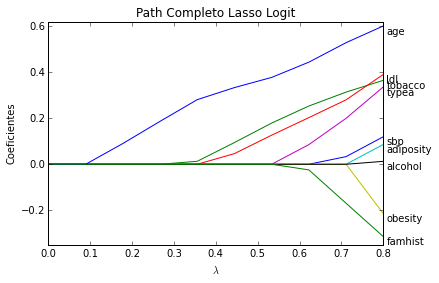

In [45]:
# Vamos a probar la función
A = lasso_logit_path(yy,fullxmat,0.8)
grd_lamb = np.linspace(0.0001, 0.8, 10)
df = pd.DataFrame(A, index = grd_lamb, columns=labs_x)
ax = df.plot()
#plt.axis([])
plt.grid('off')
ax.legend_.remove()
plt.axis([0,0.8,-0.35,0.62])
ax.set_title('Path Completo Lasso Logit')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('Coeficientes')
# Obtengamos las etiquetas
for v in range(9):
    lab_v = labs_x[v]
    plt.text(0.81,df[lab_v].iloc[-1], lab_v, horizontalalignment='left', verticalalignment='top')


# Comparémoslo con los resultados del libro


![alt text](figures/lasso_logit.png)
